# 劉泰佑 - C100E030

In [12]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [13]:
print(len(os.listdir('Dataset/kagglecatsanddogs_5340/PetImages/Cat')))
print(len(os.listdir('Dataset/kagglecatsanddogs_5340/PetImages/Dog')))

# Expected Output:
# 12501
# 12501

12501
12501


In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "Dataset/kagglecatsanddogs_5340/PetImages/Cat/"
TRAINING_CATS_DIR = "Dataset/Cat_Dog_data/train/cat"
TESTING_CATS_DIR = "Dataset/Cat_Dog_data/test/cat"
DOG_SOURCE_DIR = "Dataset/kagglecatsanddogs_5340/PetImages/Dog/"
TRAINING_DOGS_DIR = "Dataset/Cat_Dog_data/train/dog"
TESTING_DOGS_DIR = "Dataset/Cat_Dog_data/test/dog"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


In [15]:
print(len(os.listdir('Dataset/Cat_Dog_data/train/cat')))
print(len(os.listdir('Dataset/Cat_Dog_data/train/dog')))
print(len(os.listdir('Dataset/Cat_Dog_data/test/cat')))
print(len(os.listdir('Dataset/Cat_Dog_data/test/dog')))

# Expected output:
# 11250
# 11250
# 1250
# 1250

11250
11250
1250
1250


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [17]:
TRAINING_DIR = "Dataset/Cat_Dog_data/train"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "Dataset/Cat_Dog_data/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                batch_size=250,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [18]:
# Note that this may take some time.
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,
                    validation_data=validation_generator, validation_steps=6)

Epoch 1/15


2022-11-18 09:36:28.035210: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-18 09:36:28.831769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - ETA: 0s - loss: 0.8362 - acc: 0.5854

2022-11-18 09:37:07.702931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 42s 428ms/step - loss: 0.8362 - acc: 0.5854 - val_loss: 0.7105 - val_acc: 0.5713
Epoch 2/15
90/90 [==============================] - 36s 397ms/step - loss: 0.6250 - acc: 0.6708 - val_loss: 0.5842 - val_acc: 0.6967
Epoch 3/15
90/90 [==============================] - 36s 394ms/step - loss: 0.5566 - acc: 0.7186 - val_loss: 0.5133 - val_acc: 0.7353
Epoch 4/15
90/90 [==============================] - 31s 340ms/step - loss: 0.4954 - acc: 0.7551 - val_loss: 0.4736 - val_acc: 0.7600
Epoch 5/15
90/90 [==============================] - 32s 348ms/step - loss: 0.4426 - acc: 0.7911 - val_loss: 0.4493 - val_acc: 0.7927
Epoch 6/15
90/90 [==============================] - 31s 346ms/step - loss: 0.3895 - acc: 0.8241 - val_loss: 0.4803 - val_acc: 0.7873
Epoch 7/15
90/90 [==============================] - 37s 412ms/step - loss: 0.3455 - acc: 0.8458 - val_loss: 0.7014 - val_acc: 0.6480
Epoch 8/15
90/90 [==============================] - 41s 449ms/step - loss: 0.291

Save model

In [ ]:
# model.save("Model/cat_dog.h5")

Evaluation

<Figure size 640x480 with 0 Axes>

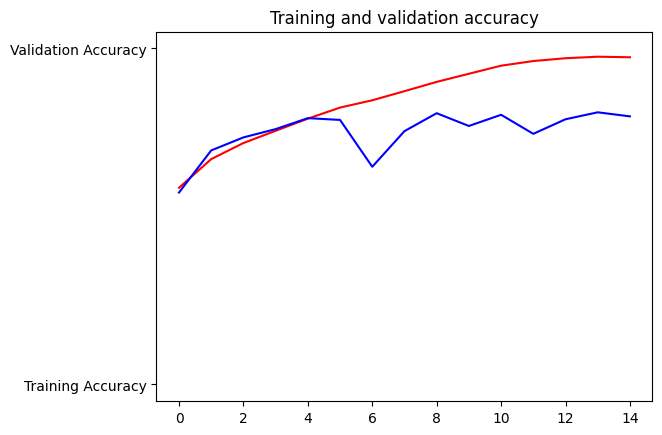

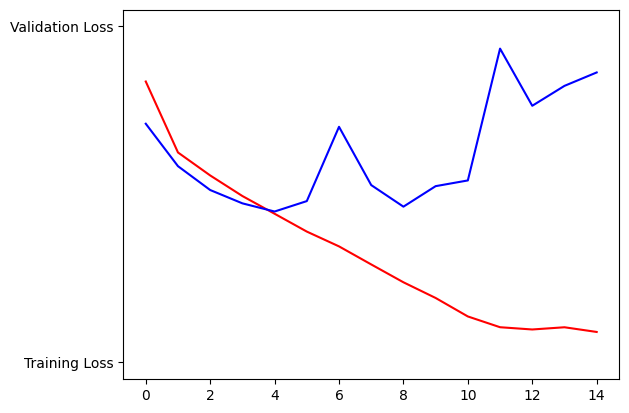

<Figure size 640x480 with 0 Axes>

In [19]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [28]:
labels = ['cats','dogs']
predictions = ['cats','dogs']

In [29]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [30]:
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Test Accuracy   : 100.00 %
Precision Score : 100.00 %
Recall Score    : 100.00 %


<Figure size 2000x500 with 0 Axes>

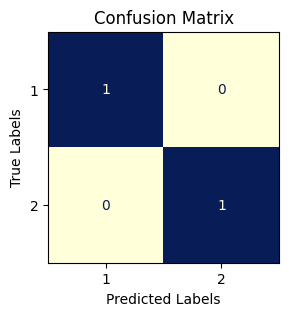

In [33]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=list(range(1,3)))
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

1/1 [==============================] - 0s 25ms/step
[0.]
is a cat


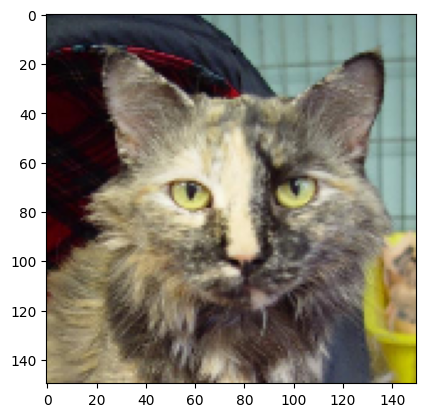

In [52]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

path = 'Dataset/kagglecatsanddogs_5340/PetImages/Cat/10.jpg' # Manually select image path
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    plt.imshow(img)
    print("is a dog")
else:
    plt.imshow(img)
    print("is a cat")